In [50]:
import pandas as pd
data=pd.read_csv('../data/Table1_new.csv')
data['age']=2019-data['Year_of_publication']+1
data['citation_per_year']=data['Number_of_Citations']/data['age']
data.head()

,Unnamed: 0,Year_of_publication,Aligner,URL,Citation,read_length,max_read_length_tested,Title,Number_of_Citations,Indexing,...,fix length seed,Variable length seed (hybrid seeding),spaced seed,chain_of_seeds,Application,email - first author,email - last author,Verified,age,citation_per_year
0,43.0,2011,Bismark,https://www.bioinformatics.babraham.ac.uk/proj...,Krueger et al. ‎2011,Ultra-short,50,Bismark: a flexible aligner and methylation ca...,1550,BWT-FM,...,Y,N,N,N,BS-Seq,felix.krueger@bbsrc.ac.uk,NaN,NaN,9,172.222222
1,16.0,2009,BRAT,http://compbio.cs.ucr.edu/brat/,Harris et al. 2009,Ultra-short,26,BRAT: bisulfite-treated reads analysis tool,64,Hashing,...,Y,N,N,N,BS-Seq,elenah@cs.ucr.edu,stefano.lonardi@ucr.edu,NaN,11,5.818182
2,54.0,2012,BRAT-BW,http://compbio.cs.ucr.edu/brat/,Harris et al. 2012,Ultra-short,62,BRAT-BW: efficient and accurate mapping of bis...,70,BWT-FM,...,N,Y,N,N,BS-Seq,elenayharris@gmail.com,stefano.lonardi@ucr.edu,NaN,8,8.750000
3,32.0,2010,BS-Seeker,https://github.com/BSSeeker/BSseeker2,Chen et al. ‎2010,Ultra-short,36,BS Seeker: precise mapping for bisulfite seque...,215,BWT-FM,...,Y,N,N,N,BS-Seq,paoyang@gate.sinica.edu.tw,matteop@mcdb.ucla.edu,NaN,10,21.500000
4,63.0,2013,BS-Seeker2,https://github.com/BSSeeker/BSseeker2,Guo et al. ‎2013,Short,250,BS-Seeker2: a versatile aligning pipeline for ...,173,BWT-FM,...,Y,N,N,N,BS-Seq,guoweilong@cau.edu.cn,matteop@mcdb.ucla.edu,NaN,7,24.714286


In [51]:
rt = pd.read_csv('../data/compare.tools.runtime.hours.csv')
mem = pd.read_csv('../data/compare.tools.memory.csv')

In [52]:
data_cite = data.loc[:,['citation_per_year', 'Aligner', 'Application', 'Indexing', 'Global_Positioning', 
                       'Pairwise_alignment_2']]
data_cite.loc[:,'aligner_lower'] = data_cite['Aligner'].str.lower()
rt.loc[:,'tools_lower'] = rt['Tools'].str.lower()
rtcite = pd.merge(rt, data_cite, left_on='tools_lower', right_on='aligner_lower', how='inner')
rtcite.loc[:,'average_runtime'] = rtcite.iloc[:,1:11].mean(axis=1)
rtcite_new = pd.melt(rtcite, id_vars = ['Tools', 'citation_per_year', 'Application', 'Indexing', 
                                        'Global_Positioning', 'Pairwise_alignment_2'], 
        value_vars = ['ERR009309', 'ERR013127', 'ERR013138', 'ERR045708', 'ERR050158', 'ERR162843', 'ERR181410',
                     'ERR183377', 'SRR061640', 'SRR360549'], value_name = 'runtime')
rtcite_summ = rtcite.loc[:,['Tools', 'citation_per_year', 'average_runtime', 'Application', 'Indexing', 'Global_Positioning', 'Pairwise_alignment_2']]
rtcite_summ

,Tools,citation_per_year,average_runtime,Application,Indexing,Global_Positioning,Pairwise_alignment_2
0,Bowtie2,2010.125000,4.973138,DNA,BWT-FM,Backward Search,Local & Global
1,Bowtie,1353.636364,6.102213,DNA,BWT-FM,Backward Search,Hamming Distance
2,BWA,1831.181818,6.239311,DNA,BWT-FM,Backward Search,Local
3,ERNE,2.250000,8.281991,DNA,Hashing,Seed,Hamming Distance
4,gsnap,154.900000,20.924469,DNA,Hashing,Seed,Non-DP Heuristic
5,hisat2,19.000000,1.158713,DNA,BWT-FM,Backward Search,Hamming Distance
6,last,62.777778,20.221401,DNA,Suffix Array,Seed,Local
7,lordfast,1.000000,0.208568,DNA,Hashing,Seed,Global
8,minimap2,197.000000,1.866426,DNA/RNA-Seq,Hashing,Seed,Global
9,rmap,32.083333,12.950420,DNA,Hashing,Seed,Hamming Distance


In [53]:
mem.loc[:,'tools_lower'] = mem['Tools'].str.lower()
memcite = pd.merge(mem, data_cite, left_on='tools_lower', right_on='aligner_lower', how='inner')
memcite.loc[:,'average_memory'] = memcite.iloc[:,1:11].mean(axis=1)
memcite_new = pd.melt(memcite, id_vars = ['Tools', 'citation_per_year', 'Application', 'Indexing', 
                                        'Global_Positioning', 'Pairwise_alignment_2'], 
        value_vars = ['ERR009309', 'ERR013127', 'ERR013138', 'ERR045708', 'ERR050158', 'ERR162843', 'ERR181410',
                     'ERR183377', 'SRR061640', 'SRR360549'], value_name = 'memory')
memcite_summ = memcite.loc[:,['Tools', 'citation_per_year', 'average_memory', 'Application', 'Indexing', 'Global_Positioning', 'Pairwise_alignment_2']]
memcite_summ

,Tools,citation_per_year,average_memory,Application,Indexing,Global_Positioning,Pairwise_alignment_2
0,Bowtie2,2010.125000,3.5799,DNA,BWT-FM,Backward Search,Local & Global
1,Bowtie,1353.636364,3.1940,DNA,BWT-FM,Backward Search,Hamming Distance
2,BWA,1831.181818,5.7110,DNA,BWT-FM,Backward Search,Local
3,ERNE,2.250000,5.3951,DNA,Hashing,Seed,Hamming Distance
4,gsnap,154.900000,28.8536,DNA,Hashing,Seed,Non-DP Heuristic
5,hisat2,19.000000,4.6941,DNA,BWT-FM,Backward Search,Hamming Distance
6,last,62.777778,15.3589,DNA,Suffix Array,Seed,Local
7,lordfast,1.000000,5.6897,DNA,Hashing,Seed,Global
8,minimap2,197.000000,12.4488,DNA/RNA-Seq,Hashing,Seed,Global
9,rmap,32.083333,9.5320,DNA,Hashing,Seed,Hamming Distance


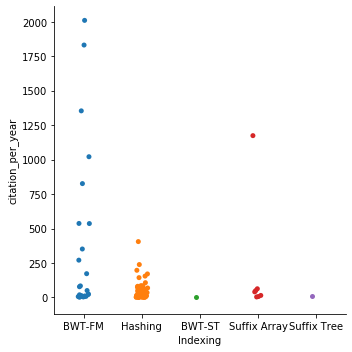

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.catplot(data=data_cite, x='Indexing', y='citation_per_year')
plt.show()

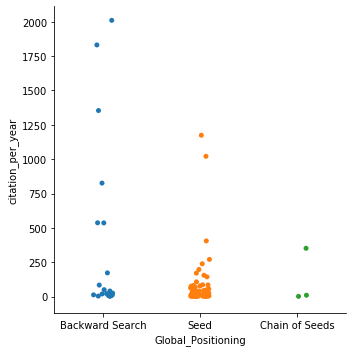

In [55]:
ax = sns.catplot(data=data_cite, x='Global_Positioning', y='citation_per_year')
plt.show()

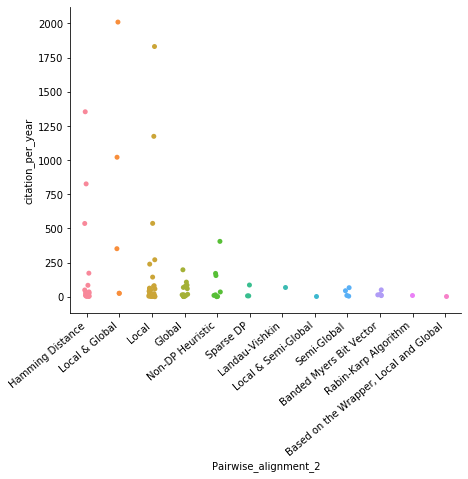

In [56]:
ax = sns.catplot(data=data_cite, x='Pairwise_alignment_2', y='citation_per_year', height=5, aspect=1.5)
ax.set_xticklabels(rotation=40, ha="right")
plt.show()

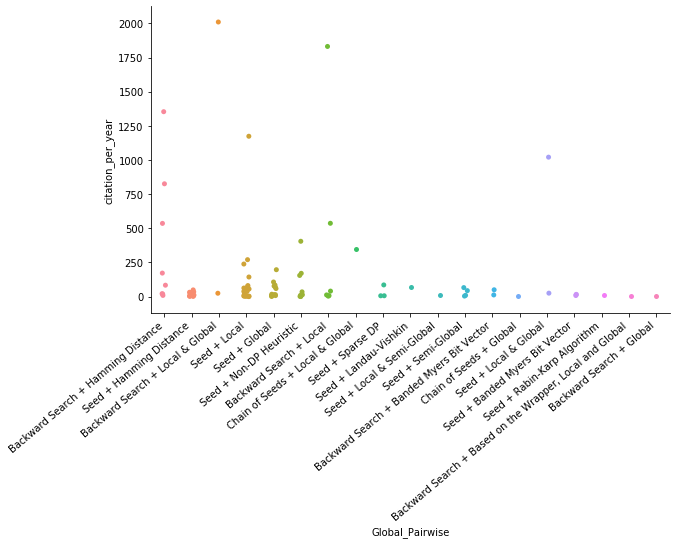

In [57]:
data_cite.loc[:,'Global_Pairwise'] = data_cite.loc[:,'Global_Positioning'] + " + " + data_cite.loc[:,'Pairwise_alignment_2']

ax = sns.catplot(data=data_cite, x='Global_Pairwise', y='citation_per_year', height=5, aspect=2)
ax.set_xticklabels(rotation=40, ha="right")

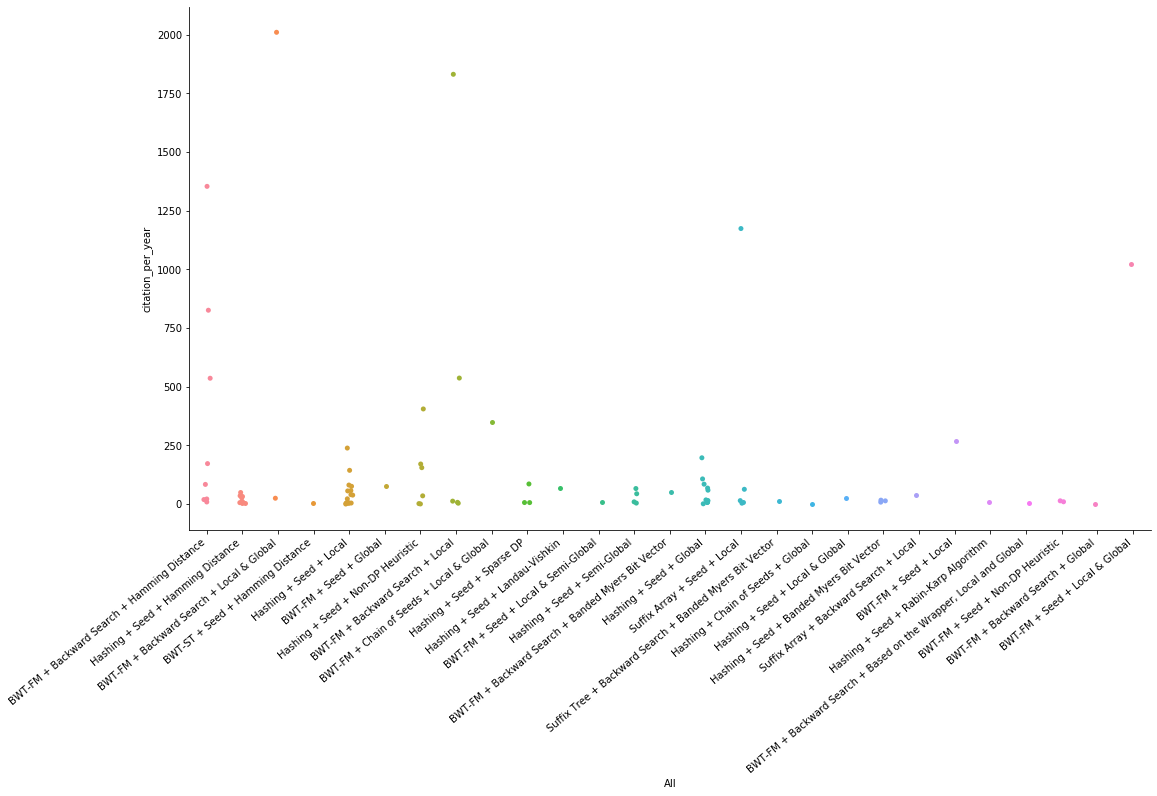

In [58]:
data_cite.loc[:,'All'] = data_cite.loc[:,'Indexing'] + " + " + data_cite.loc[:,'Global_Pairwise']

ax = sns.catplot(data=data_cite, x='All', y='citation_per_year', height=8, aspect=2)
ax.set_xticklabels(rotation=40, ha="right")
plt.show()

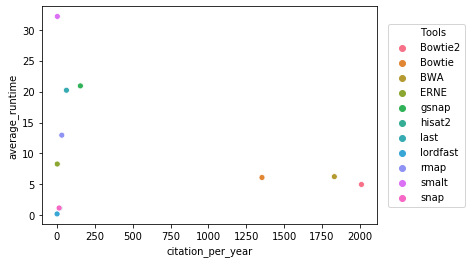

In [32]:
ax = sns.scatterplot(data = rtcite.loc[rtcite['Application'] == 'DNA'], x = 'citation_per_year', 
                     y = 'average_runtime', hue='Tools')
ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), ncol=1)
plt.show()

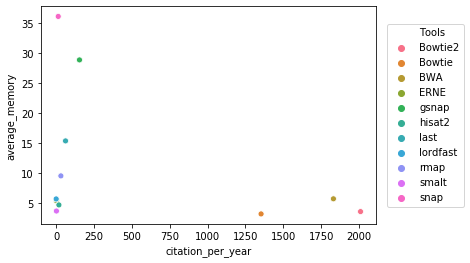

In [34]:
ax = sns.scatterplot(data = memcite.loc[rtcite['Application'] == 'DNA'], x = 'citation_per_year', 
                     y = 'average_memory', hue='Tools')
ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), ncol=1)
plt.show()

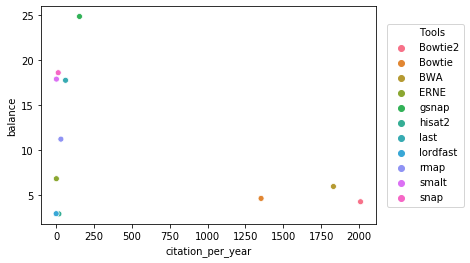

In [41]:
rtvm = pd.merge(rtcite_summ, memcite_summ, 
                on=['Tools','citation_per_year','Application','Indexing','Global_Positioning','Pairwise_alignment_2'],
                how='inner')
rtvm.loc[:,'balance'] = (rtvm.loc[:,'average_runtime']+rtvm.loc[:,'average_memory'])/2

ax = sns.scatterplot(data = rtvm.loc[rtvm['Application'] == 'DNA'], x = 'citation_per_year', 
                     y = 'balance', hue='Tools')
ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), ncol=1)
plt.show()